https://quantatrisk.com/2016/11/03/financial-time-series-segmentation-turning-points-python/

## Financial Time-Series Segmentation Based On Turning Points in Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def first_tps(p):
    tp = []
    for i in range(1, len(p)-1):
        if((p[i] < p[i+1]) and (p[i] < p[i-1])) or ((p[i] > p[i+1]) and (p[i] > p[i-1])):
            tp.append(i)
    return tp
 
def contains_point_in_uptrend(i, p):
    if(p[i] < p[i+1]) and (p[i] < p[i+2]) and (p[i+1] < p[i+3]) and (p[i+2] < p[i+3]) and (abs(p[i+1] - p[i+2]) < abs(p[i] - p[i+2]) + abs(p[i+1] - p[i+3])):
        return True
    else:
        return False
 
def contains_point_in_downtrend(i, p):
    if(p[i] > p[i+1]) and (p[i] > p[i+2]) and (p[i+1] > p[i+3]) and (p[i+2] > p[i+3]) and (abs(p[i+2] - p[i+1]) < abs(p[i] - p[i+2]) + abs(p[i+1] - p[i+3])):
        return True
    else:
        return False
 
def points_in_the_same_trend(i, p, thr):
    if(abs(p[i]/p[i+2]-1) < thr) and (abs(p[i+1]/p[i+3]-1) < thr):
        return True
    else:
        return False
 
def turning_points(idx, p, thr):
    i = 0
    tp = []
    while(i < len(idx)-3):
        if contains_point_in_downtrend(idx[i], p) or contains_point_in_uptrend(idx[i], p) or points_in_the_same_trend(idx[i], p, thr):
            tp.extend([idx[i], idx[i+3]])
            i += 3
        else:
            tp.append(idx[i])
            i += 1
    return tp

def parse_data_1(filename):
    cols = ["unix", "open", "high", "low", "close", "volume", "tbqav", "tbbav", "qav", "noftrades"]
    data = pd.read_csv(filename, sep = "|", header=None, names = cols)
    data = data[["unix","open","low","close","high","volume"]]
    data["volume"].replace({0: 0.000000000000001}, inplace=True)
    return data


In [2]:
data = parse_data_1("ETHUSDT.csv")
unix = data.unix
close = data.close
unix = unix[:10000]
close = close[:10000]

No handles with labels found to put in legend.


[299.4, 300.8, 300.8, 302.6, 302.6, 304.53, 304.53, 308.65, 308.65, 307.39, 307.39, 308.74, 308.74, 311.46, 311.46, 312.0, 312.0, 309.95, 309.95, 310.05]
[299.4, 302.6, 302.6, 304.53, 304.53, 307.39, 307.39, 308.74, 308.74, 312.0, 312.0, 309.95, 309.95, 308.07, 308.07, 308.45, 308.45, 305.49, 305.49, 306.4]
[299.4, 304.53, 304.53, 307.39, 307.39, 312.0, 312.0, 309.95, 309.95, 308.45, 308.45, 305.49, 305.49, 303.9, 303.9, 307.05, 307.05, 302.0, 302.0, 306.31]
[299.4, 307.39, 307.39, 312.0, 312.0, 308.45, 308.45, 305.49, 305.49, 307.05, 307.05, 302.0, 302.0, 304.22, 304.22, 296.95, 296.95, 306.9, 306.9, 305.91]
[299.4, 312.0, 312.0, 308.45, 308.45, 307.05, 307.05, 302.0, 302.0, 296.95, 296.95, 306.9, 306.9, 308.47, 308.47, 303.46, 303.46, 293.18, 293.18, 292.67]
[299.4, 308.45, 308.45, 307.05, 307.05, 296.95, 296.95, 306.9, 306.9, 303.46, 303.46, 293.18, 293.18, 290.59, 290.59, 297.19, 297.19, 284.4, 284.4, 295.47]
[299.4, 307.05, 307.05, 296.95, 296.95, 303.46, 303.46, 293.18, 293.18, 2

Text(0.5, 0, 'Timestamp')

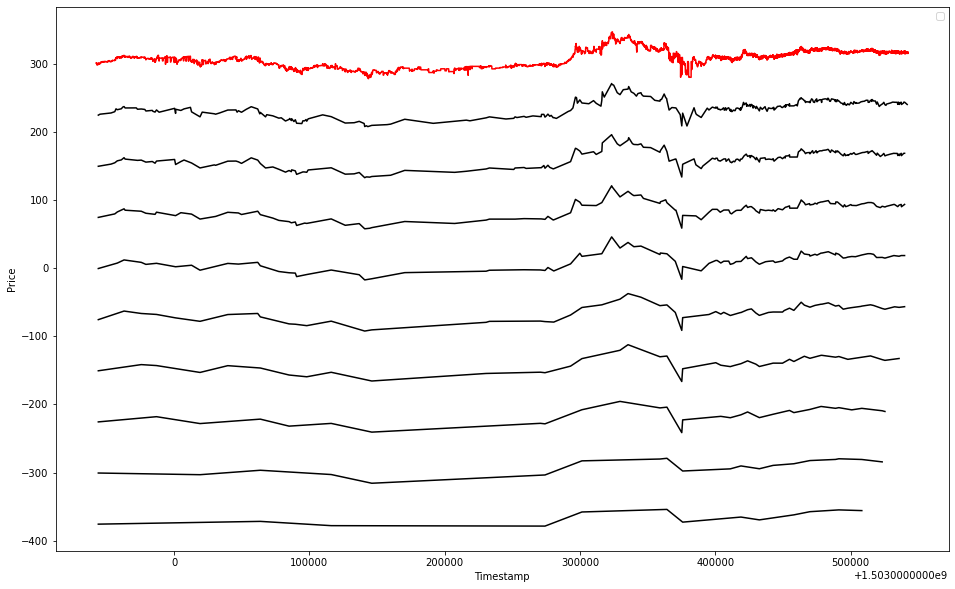

In [3]:
thr = 0.05
sep = 75  # separation for plotting
 
P1 = close
tp1 = first_tps(P1)
 
plt.figure(figsize=(16,10))
 
plt.plot(unix, P1, 'r', label="")
plt.legend(loc='best')
 
for k in range(1, 10):  # k over a given range of sub-levels
    tp1 = turning_points(tp1, P1, thr)
    print(list(close[tp1][:20]))
    plt.plot(unix[tp1], close[tp1]-sep*k, 'k')
    
plt.axis('tight')
plt.ylabel('Price')
plt.xlabel('Timestamp')